# Assignment 1: Classifying handwritten digits using probability theory

# 1. Introduce the problem in your own words. You should mention what data we use, what we want to do with it and how we will do it. Explain with your own words the Naive Bayes classifier, it's assumptions and how this can classify the digits $0-9$.

Write your answer here.

The data set cointains images with black background and drawings of numbers from zero to nine in white. The objective is to build a classifier that can correctly distinguish what is the number drawed in the image. For this the Naive Bayes classifier will be used. This is an aproximation where each pixel is analyse indpendently of the others, the advange of this is that the number of calclations is significantly smaller. To use the Naive Bayes classifier each pixel is assumed to be independent of the other. However, this may not alwayls be the case. Furthermore, the Naive Bayes approximation can be used to calculate the probabability of a an image to have one of the given numbers. Lastly, these calculations can be used together with a classifiying rule to classify the numbers.   

In [77]:
from __future__ import division
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import plot_confusion_matrix


# 2. Load the data

In [78]:
# load data
data = np.load("mnist_bin.npz") # insert your answer here

# get vector representation of binary digits
X = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)

The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


#### Run the code beneath. It plots 10 images of each digit. 


In [79]:
def show_image(x, title="", clim=None, cmap=plt.cm.gray, colorbar=False):
    ax = plt.gca()
    im = ax.imshow(x.reshape((28, 28)), cmap=cmap, clim=clim)
    
    if len(title) > 0:
        plt.title(title)
        
    plt.axis('off')
    
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

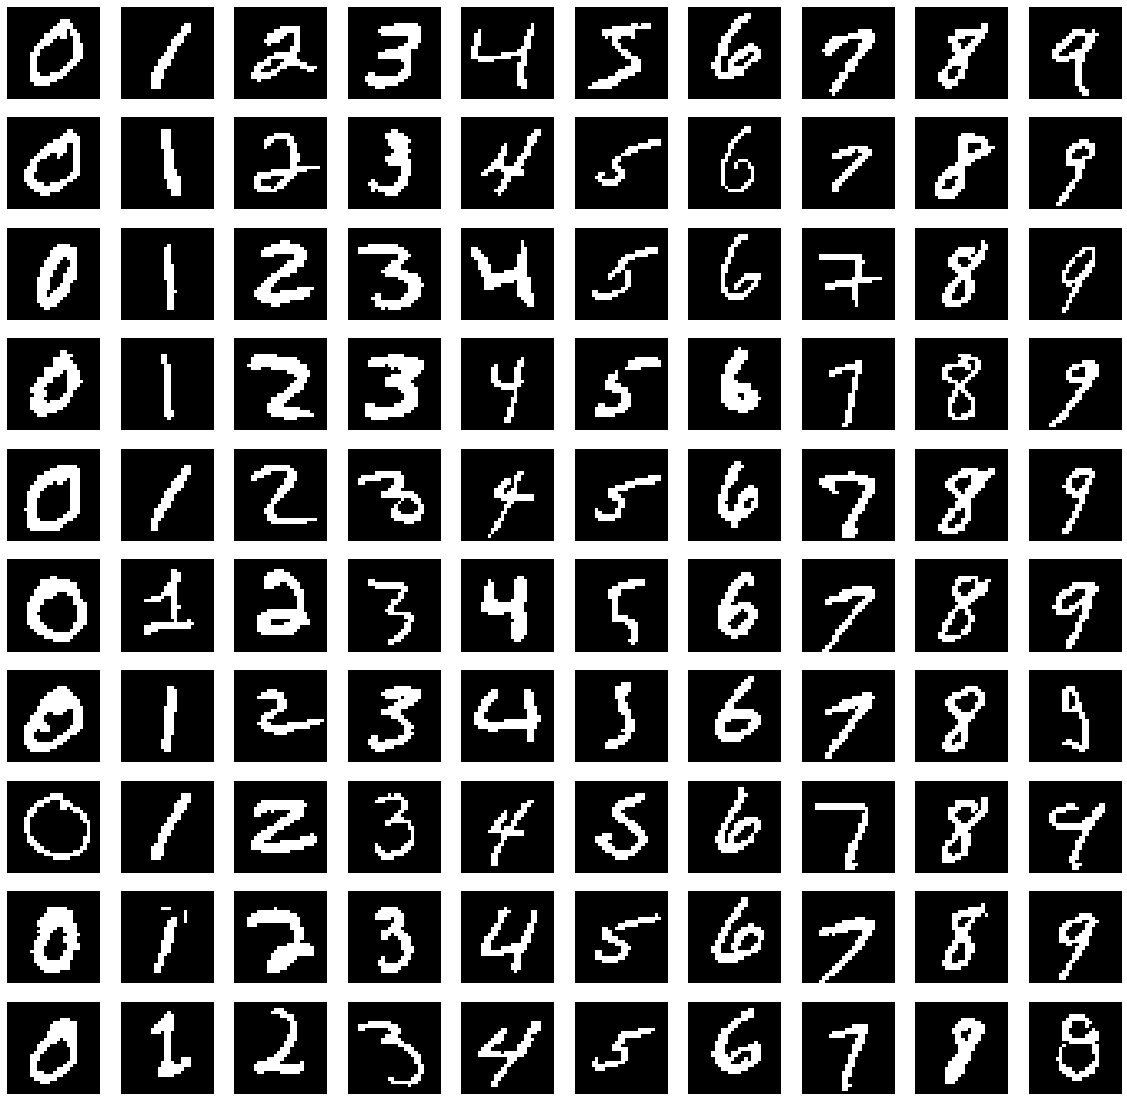

In [80]:
num_images_per_row  = 10
num_labels          = 10

plt.figure(figsize=(20, 20))
counter             = 1
for i in range(num_labels):
    for l in range(num_images_per_row):
        plt.subplot(num_labels, num_images_per_row, counter)

        all_images_belonging_to_class_l = X[y==l,:]
        one_images_belonging_to_class_l = all_images_belonging_to_class_l[i]
        
        show_image(one_images_belonging_to_class_l)  
        counter += 1



# 3. Explain what a training set is, what a test set is and why we as data scientists *always* split data into test/train before doing any modelling. What do we want to avoid?

Write your answer here

The total data set is divided into two sets, the train and the test. The model is going to be developed using the train. Then the correctness of the model will be evaluated using the test. LL suggestion: The partition is made in order to show how well the model generalizes on new data. Since models will be implemented to predict future numbers they have not seen before, they should be validated on the same premise. 

In [81]:
N = len(X)
N_train = int(0.8*N)
N_test = N-N_train

# set random seed:
np.random.seed(0) # don't change this :-)

# create a random permutation for splitting into training and test
randperm = np.random.permutation(N)

# split into training and test
train_idx = randperm[:N_train]
test_idx = randperm[N_train:]
Xtrain, Xtest = X[train_idx, :], X[test_idx, :]
ytrain, ytest = y[train_idx], y[test_idx]

print('Total number of images:\t\t%d' % N)
print('Number of training images:\t%d' % N_train)
print('Number of test images:\t\t%d' % N_test)
print(ytrain)

Total number of images:		70000
Number of training images:	56000
Number of test images:		14000
[0 4 1 ... 2 4 6]


# 4. Implement/change the code to handle all digits. 
### Fitting the Naı̈ve-Bayes model to training set: the prior

In [82]:
# count the number of zeros and ones, AND twos, threes, etc.


possible_numbers_vector = np.arange(10)
count_vector= np.arange(10)

for i in count_vector:
    count_vector[i] = np.sum(ytrain == i)

prob_of_numbers_vector = count_vector/ N_train #this vector contains the probability of each number to occur

# Prints all the priors
for i in possible_numbers_vector:
    print('Prior probability (Y = %d)  = %d/%d = %3.2f' % (possible_numbers_vector[i], count_vector[i], N_train, prob_of_numbers_vector[i]))



[5573 6280 5592 5700 5480 5063 5507 5778 5449 5578]
[0.09951786 0.11214286 0.09985714 0.10178571 0.09785714 0.09041071
 0.09833929 0.10317857 0.09730357 0.09960714]
Prior probability (Y = 0)  = 5573/56000 = 0.10
Prior probability (Y = 1)  = 6280/56000 = 0.11
Prior probability (Y = 2)  = 5592/56000 = 0.10
Prior probability (Y = 3)  = 5700/56000 = 0.10
Prior probability (Y = 4)  = 5480/56000 = 0.10
Prior probability (Y = 5)  = 5063/56000 = 0.09
Prior probability (Y = 6)  = 5507/56000 = 0.10
Prior probability (Y = 7)  = 5778/56000 = 0.10
Prior probability (Y = 8)  = 5449/56000 = 0.10
Prior probability (Y = 9)  = 5578/56000 = 0.10


The code beneath is taken from Exercise 1 and it only handles digits 0 and 1. Change the code to handle all digits.

### Fitting the Naı̈ve-Bayes model to training set: the likelihood

In [83]:
### split data base on its label value and put them in a matrix 
# fit model for zeros and ones separately

p_numbers_vector = []
for k in range(10):
    # fit model for zeros and ones separately
    Xtrain_num = Xtrain[ytrain == k, :]
    # p(X_i = 1| Y = k) 
    p_numbers_vector.append(np.mean(Xtrain_num, axis=0))
p_digits = p_numbers_vector



In [91]:
# This code should be sufficient, i.e. don't change this.
def log_likelihood(x_new, p_digit):
    pixel_log_lik = x_new*np.log(p_digit + 1e-16) + (1-x_new)*np.log(1-p_digit)
    return np.sum(pixel_log_lik)
    
image_idxs_to_be_classified = [0,10,510,810]
for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]
    print('Image idx: %d (label=%d)' % (image_idx, ytrain[image_idx]))
    
    for i in range(10):
        print('p(x_new | Y=%d): %3.2e' % (i ,np.exp(log_likelihood(x_new, p_digits[i]))))
    print('\n')

Image idx: 0 (label=0)
p(x_new | Y=0): 1.17e-85
p(x_new | Y=1): 1.53e-243
p(x_new | Y=2): 3.91e-119
p(x_new | Y=3): 5.44e-123
p(x_new | Y=4): 1.82e-118
p(x_new | Y=5): 3.26e-109
p(x_new | Y=6): 6.55e-99
p(x_new | Y=7): 6.98e-188
p(x_new | Y=8): 1.24e-109
p(x_new | Y=9): 1.08e-134


Image idx: 10 (label=1)
p(x_new | Y=0): 3.40e-122
p(x_new | Y=1): 2.94e-34
p(x_new | Y=2): 5.53e-75
p(x_new | Y=3): 1.24e-76
p(x_new | Y=4): 2.29e-86
p(x_new | Y=5): 2.74e-76
p(x_new | Y=6): 1.37e-112
p(x_new | Y=7): 1.06e-83
p(x_new | Y=8): 7.47e-68
p(x_new | Y=9): 6.80e-81


Image idx: 510 (label=1)
p(x_new | Y=0): 2.39e-125
p(x_new | Y=1): 5.00e-34
p(x_new | Y=2): 3.51e-73
p(x_new | Y=3): 1.31e-78
p(x_new | Y=4): 7.04e-96
p(x_new | Y=5): 9.44e-78
p(x_new | Y=6): 3.88e-88
p(x_new | Y=7): 3.38e-107
p(x_new | Y=8): 7.98e-68
p(x_new | Y=9): 6.62e-90


Image idx: 810 (label=6)
p(x_new | Y=0): 6.20e-151
p(x_new | Y=1): 7.56e-150
p(x_new | Y=2): 1.27e-89
p(x_new | Y=3): 2.06e-128
p(x_new | Y=4): 4.94e-108
p(x_ne

# Continue from this part, greetings Pat 

### Implementing Bayes's theorem

In [85]:
# Change the function to handle all digits (you may use for loop instead repeating the same code)
def compute_posterior_prob(x_new):
    # compute log likelihood
    log_lik_zeros = log_likelihood(x_new, prob_of_numbers_vector[0])
    log_lik_ones = log_likelihood(x_new, prob_of_numbers_vector[1])
    log_lik_twos = log_likelihood(x_new, prob_of_numbers_vector[2])
    log_lik_threes = log_likelihood(x_new, prob_of_numbers_vector[3])
    log_lik_fours = log_likelihood(x_new, prob_of_numbers_vector[4])
    log_lik_fives = log_likelihood(x_new, prob_of_numbers_vector[5])
    log_lik_sixes = log_likelihood(x_new, prob_of_numbers_vector[6])
    log_lik_sevens = log_likelihood(x_new, prob_of_numbers_vector[7])
    log_lik_eights = log_likelihood(x_new, prob_of_numbers_vector[8])
    log_lik_nines = log_likelihood(x_new, prob_of_numbers_vector[9])
    # extend code here

    # exponentiate
    lik_zeros = np.exp(log_lik_zeros)
    lik_ones = np.exp(log_lik_ones)
    lik_twos = np.exp(log_lik_twos)
    lik_threes = np.exp(log_lik_threes)
    lik_fours = np.exp(log_lik_fours)
    lik_fives = np.exp(log_lik_fives)
    lik_sixes = np.exp(log_lik_sixes)
    lik_sevens = np.exp(log_lik_sevens)
    lik_eights = np.exp(log_lik_eights)
    lik_nines = np.exp(log_lik_nines)
    # extend code here

    # implement eq. (4)
    term_zeros = lik_zeros*prob_of_numbers_vector[0]
    term_ones = lik_ones*prob_of_numbers_vector[1]
    term_twos = lik_twos*prob_of_numbers_vector[2]
    term_threes = lik_threes*prob_of_numbers_vector[3]
    term_fours = lik_fours*prob_of_numbers_vector[4]
    term_fives = lik_fives*prob_of_numbers_vector[5]
    term_sixes = lik_sixes*prob_of_numbers_vector[6]
    term_sevens = lik_sevens*prob_of_numbers_vector[7]
    term_eights = lik_eights*prob_of_numbers_vector[8]
    term_nines = lik_nines*prob_of_numbers_vector[9]
    # extend code here
    evidence = term_zeros+term_ones+term_twos+term_threes+term_fours+term_fives+term_sixes+term_sevens+term_eights+term_nines
    
    # insert your code here to return a vector of length 10 containing the posterior probability
    # of belonging to each class:
    post_prob_zero = term_zeros/evidence    # change this code
    post_prob_one = term_ones/evidence     # change this code
    post_prob_two = term_twos/evidence     # change this code
    post_prob_three = term_threes/evidence   # change this code
    post_prob_four = term_fours/evidence    # change this code
    post_prob_five = term_fives/evidence    # change this code
    post_prob_six = term_sixes/evidence     # change this code
    post_prob_seven = term_sevens/evidence   # change this code
    post_prob_eight = term_eights/evidence   # change this code
    post_prob_nine = term_nines/evidence    # change this code

    # Collect all probabilities into a vector
    posterior = np.array([post_prob_zero,\
                          post_prob_one,\
                          post_prob_two,\
                          post_prob_three,\
                          post_prob_four,\
                          post_prob_five,\
                          post_prob_six,\
                          post_prob_seven,\
                          post_prob_eight,\
                          post_prob_nine]) 
    return posterior

### A simple classification rule: take the class with largest posterior probability

In [86]:
def classify(x):
    posterior = compute_posterior_prob(x)
    predicted_label = np.argmax(posterior)
    return predicted_label
    

### Change this code to classify some images

[1.92826626e-04 9.95225937e-01 2.50053037e-04 1.05919950e-03
 5.26445884e-05 8.83589340e-08 7.70912743e-05 2.90182954e-03
 3.38182835e-05 2.06511340e-04]
True label: 2
Predicted label: 1
[0.08066717 0.30712166 0.08529147 0.11453436 0.06036054 0.01133843
 0.06585725 0.13851287 0.0544477  0.08186855]
True label: 7
Predicted label: 1
[1.13203428e-04 9.96838293e-01 1.49036228e-04 6.87375708e-04
 2.86821388e-05 3.39420178e-08 4.29269234e-05 2.00075985e-03
 1.79675441e-05 1.21721306e-04]
True label: 7
Predicted label: 1
[2.07652347e-03 9.68377076e-01 2.51564784e-03 7.26591539e-03
 7.93377862e-04 6.41718488e-06 1.05324943e-03 1.51566957e-02
 5.70716965e-04 2.18438001e-03]
True label: 3
Predicted label: 1
[1.44314075e-02 2.71502213e-05 1.23008660e-02 4.91284376e-03
 3.13011661e-02 8.55247182e-01 2.50328302e-02 2.50621007e-03
 4.04023005e-02 1.38380433e-02]
True label: 1
Predicted label: 5
[0.09084167 0.23168125 0.09496608 0.11964132 0.07188983 0.01755074
 0.07716456 0.13826286 0.06608218 0.091

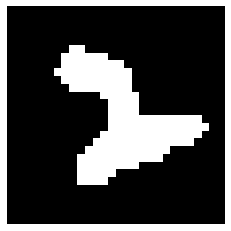

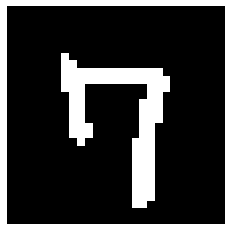

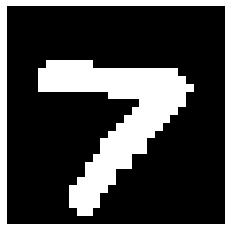

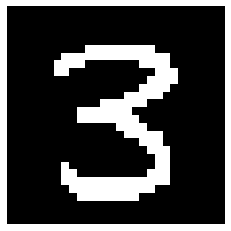

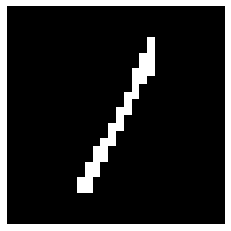

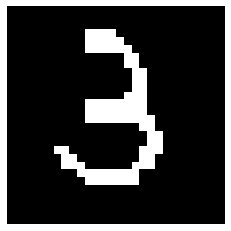

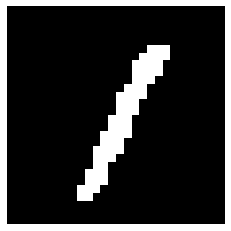

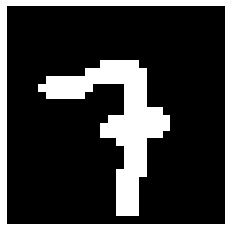

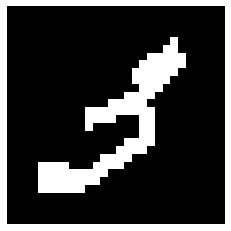

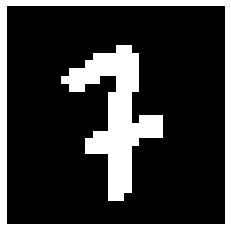

In [92]:
# Classifies the first 10 images in the test set
for i in range(10):
    f = plt.figure()
    
    # compute posterior probabilities
    posterior = compute_posterior_prob(Xtest[i, :])
    
    # get true label and predicted label
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    
    # show image 
    show_image(Xtest[i, :])
    
    # Print result
    #print('p(Y|x) = (%2.1f)' % posterior)
    print(posterior)
    print("True label:",true_label)
    print("Predicted label:",predicted_label)
    


### Let's compute the training and test errors

In [88]:
ytrain_hat = np.array([classify(x) for x in Xtrain])
ytest_hat = np.array([classify(x) for x in Xtest])

In [89]:
mean_train_acc = np.mean(ytrain_hat == ytrain)
mean_test_acc = np.mean(ytest_hat == ytest)
print('Training accuracy:\t%4.3f' % mean_train_acc)
print('Test accuracy:\t\t%4.3f' % mean_test_acc)

Training accuracy:	0.037
Test accuracy:		0.035


# 5. Compute the confusion matrix and explain what it shows.

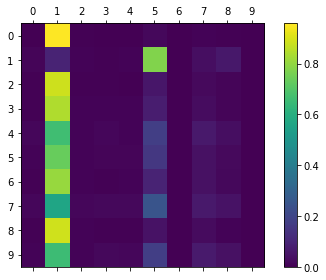

In [90]:
from sklearn.metrics import confusion_matrix
labels = list(range(10))
pred = np.array([classify(x) for x in Xtest])
cm = confusion_matrix(y_true=ytest, y_pred=pred, labels=labels,normalize="true")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticks(labels)
ax.set_yticks(labels)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

Write your explanation here

# 6. Error analysis: find images that are misclassified by the system.  Are there common characteristics among the images that are misclassified?
Write your answer here